# Data scaling and Supervised learning


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
seed = 321

## Reading File and Missing Values

In [ ]:
from google.colab import files
uploaded = files.upload()
import io
abalone = pd.read_csv((io.BytesIO(uploaded['abalone.csv']))) #data loading for colab
#abalone.info()

Saving abalone.csv to abalone (1).csv


0


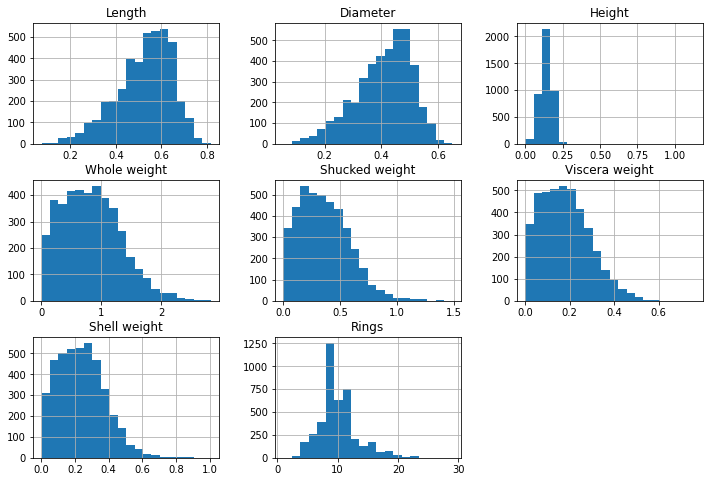

In [ ]:
print(abalone.isnull().values.sum())  #checking if there are any missing values
abalone_hst = abalone.hist(bins = 20,figsize=(12,8))
abalone_hst;  # ; is used to avoid the output of object


Transforming the column `Sex` into a continuous attribute (e.g., 0 - Female, 1 - Infant, 2 - Male) as it will be the target variable.
Building training and testing sets with a split of 80% for training and 20% for testing.

In [ ]:
abalone_selected = abalone
abalone_selected['Sex'] = abalone['Sex'].replace(['F','I','M'],[0,1,2]) # transformation to continuous attribute

#abalone_selected = abalone['Sex'].replace(['F','I','M'],[0,1,2]) # transformation to continuous attribute
#abalone['Sex'] = abalone_selected

X = abalone.iloc[:,1:]
y = abalone.iloc[:,:1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #20% test data

### Feature scaling and classification



In [ ]:
scaler = MinMaxScaler()
x_train_scaler = scaler.fit_transform(X_train)
x_test_scaler = scaler.fit_transform(X_test)
y_test_scaler = scaler.fit_transform(y_test)
#print(min_max_tdf)
reg = LogisticRegression()
reg.fit(x_train_scaler, y_train)
accuracy_score = scores = cross_val_score(reg, x_train_scaler, y_train, scoring='accuracy', n_jobs=-1) 
print('Accuracy',mean(accuracy_score))
y_pred = reg.predict(x_test_scaler)
scores = cross_val_score(reg, x_train_scaler, y_train, scoring='f1_weighted', n_jobs=-1) 
print('F1 score',mean(scores))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.5462465204120907
F1 score 0.5327227317777462


### Evaluating effects of scaling on different Classifers

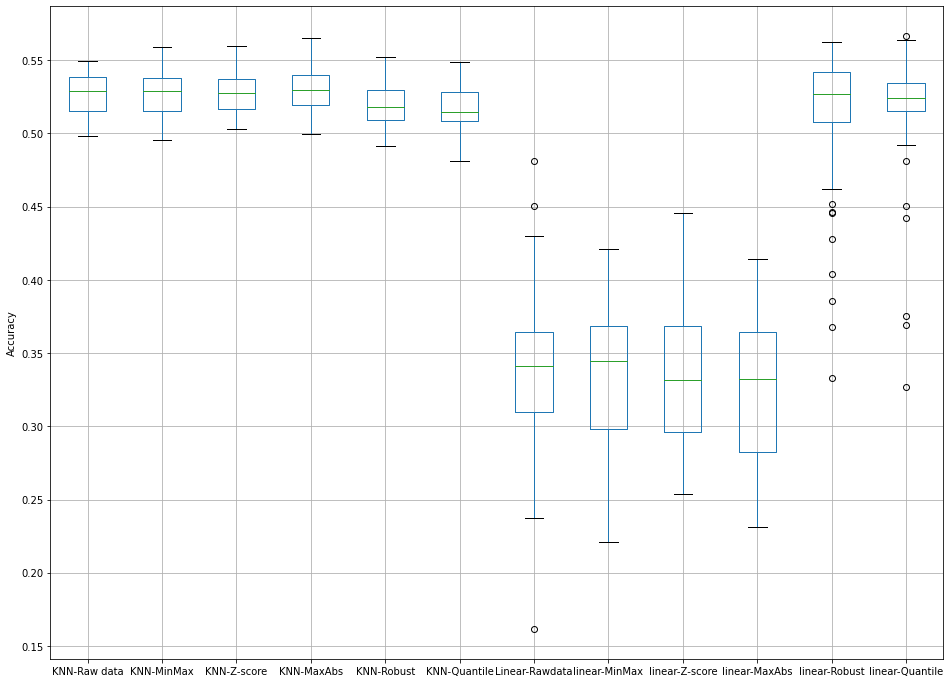

In [ ]:

knn_scaler_names = ['KNN-MinMax', 'KNN-Z-score', 'KNN-MaxAbs', 'KNN-Robust', 'KNN-Quantile'] #list of scalers to be used
sgd_scaler_names = ['linear-MinMax', 'linear-Z-score', 'linear-MaxAbs', 'linear-Robust', 'linear-Quantile']
arr_scalers = [MinMaxScaler(), Normalizer(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]
results = {}

knn_model = KNeighborsClassifier(n_neighbors=3)
sgd_model = SGDClassifier(loss="squared_error", penalty="l2", max_iter=1000)
#fig, ax = plt.subplots(figsize=(12, 7))
# Without data scaling
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(knn_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results['KNN-Raw data'] = scores

for i in range (len(arr_scalers)):
    # scaler transformation
    x_scaled = arr_scalers[i].fit_transform(X)
    # performing crossvalidation
    cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
    scores = cross_val_score(knn_model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results[knn_scaler_names[i]] = scores

# Without data scaling
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
sgd_scores = cross_val_score(sgd_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
results['Linear-Rawdata'] = sgd_scores

for i in range (len(arr_scalers)):
    # scaler transformation
    x_scaled = arr_scalers[i].fit_transform(X)
    # performing crossvalidation
    cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
    sgd_scores = cross_val_score(sgd_model, x_scaled, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results[sgd_scaler_names[i]] = sgd_scores

# plotting
df_res = pd.DataFrame(results)
boxplot = df_res.boxplot(figsize=(16,12))
boxplot.set_ylabel('Accuracy')
plt.show()